In [616]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler


In [618]:
#read the file that is provided
df=pd.read_csv("Leads.csv")

In [620]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [622]:
#check the shape of data
df.shape

(9240, 37)

In [624]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [628]:
#check for null values
df.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [630]:
#Converting 'Select' values to NaN.

df = df.replace('Select', np.nan)

In [632]:
#checking null values in each rows

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [634]:
#checking percentage of null values in each column

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [636]:
#dropping cols with more than 45% missing values

cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, axis=1, inplace = True)

In [638]:
#checking null values percentage

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [640]:
##Categorical variable analysis


In [642]:
#checking value counts of Country column

df['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

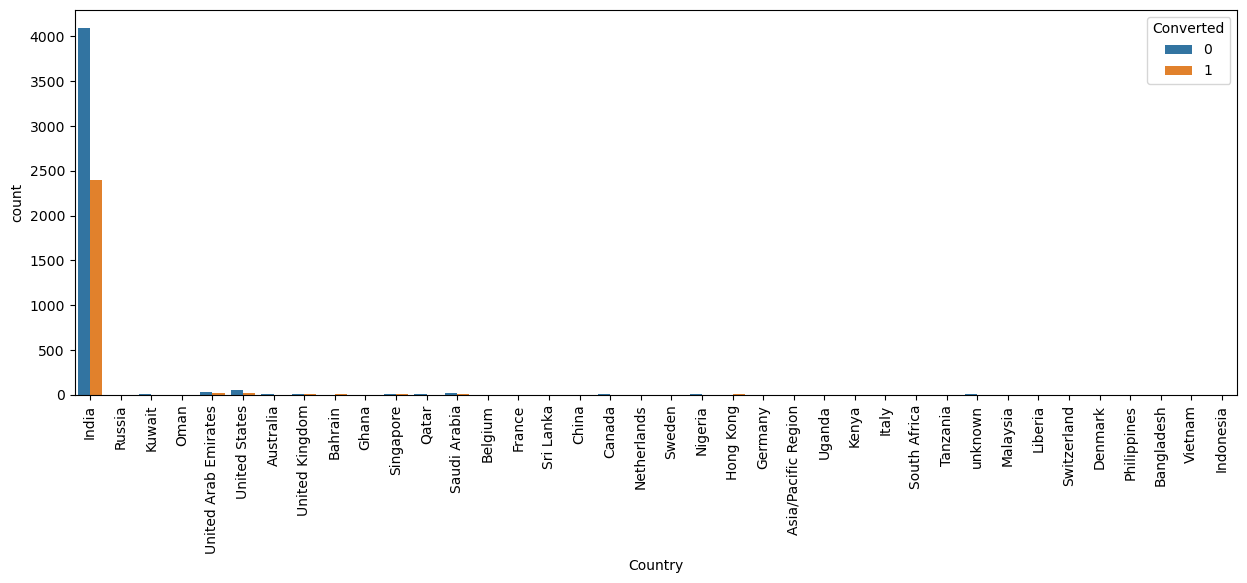

In [644]:
#plotting spread of Country columnn 
plt.figure(figsize=(15, 5))
s1 = sns.countplot(data=df, x="Country", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [646]:
#we can observe india has the highest missing values therefore drop this column
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [648]:
#checking value counts of "City" column

df['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [650]:
df['City'] = df['City'].replace(np.nan,'Mumbai')

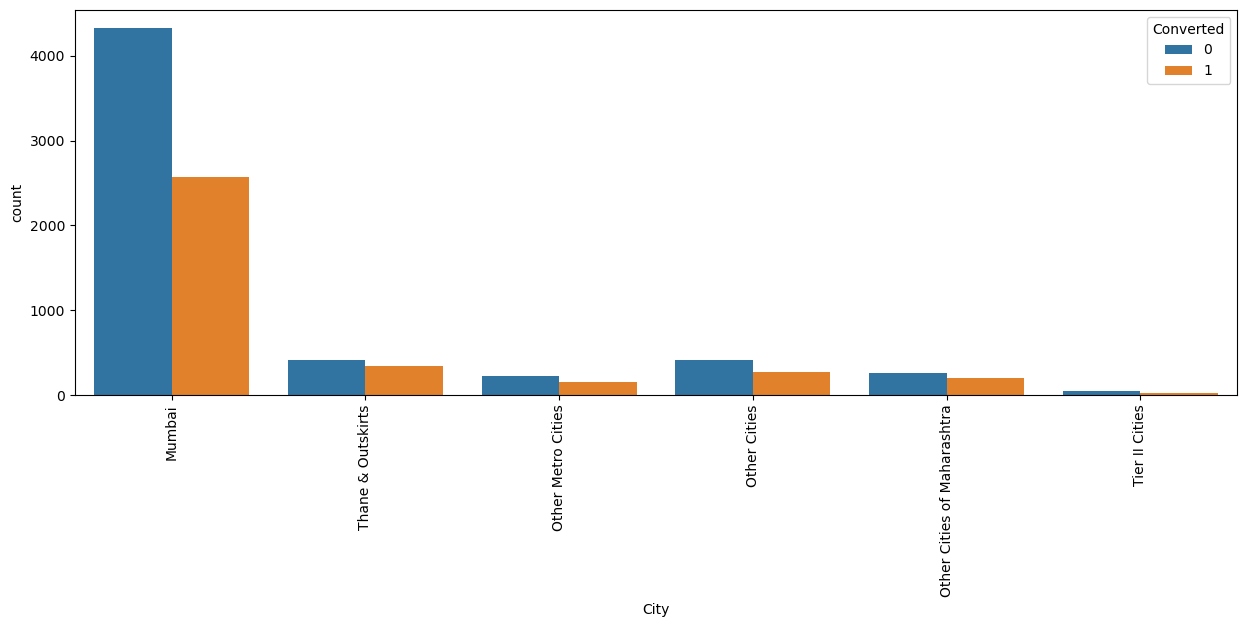

In [652]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(15, 5))
s1 = sns.countplot(data=df, x="City", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [654]:
#checking value counts of Specialization column

df['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [656]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

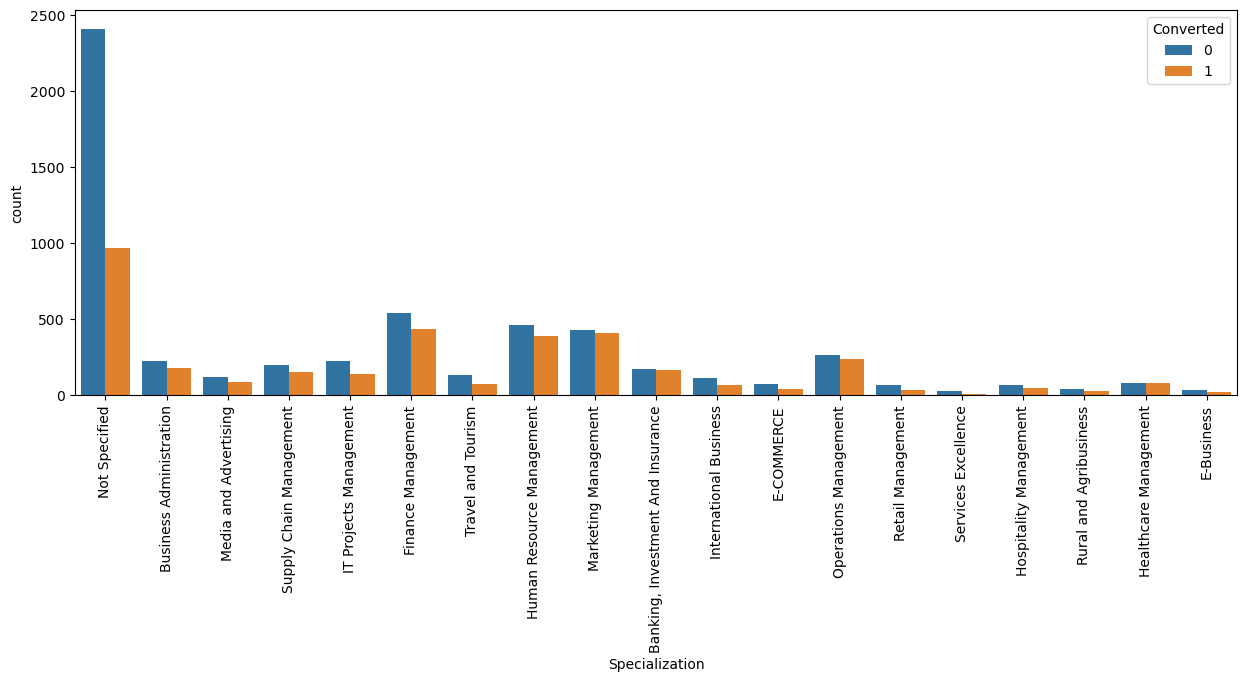

In [658]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15, 5))
s1 = sns.countplot(data=df, x="Specialization", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [659]:
#combining Management Specializations because they show similar trends since management has higher number of leads and cannot be dropped

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

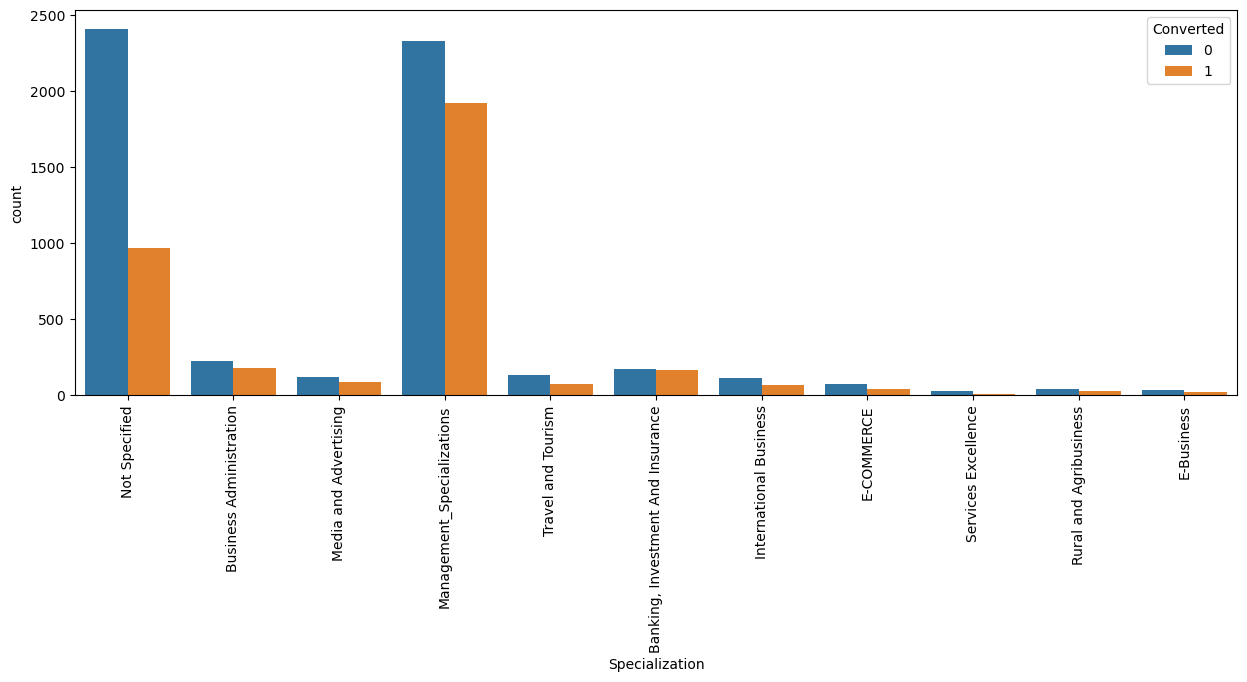

In [662]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(data=df,x="Specialization", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [664]:
#What is your current occupation

df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [666]:
#imputing Nan values with mode "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [668]:
#checking count of values
df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

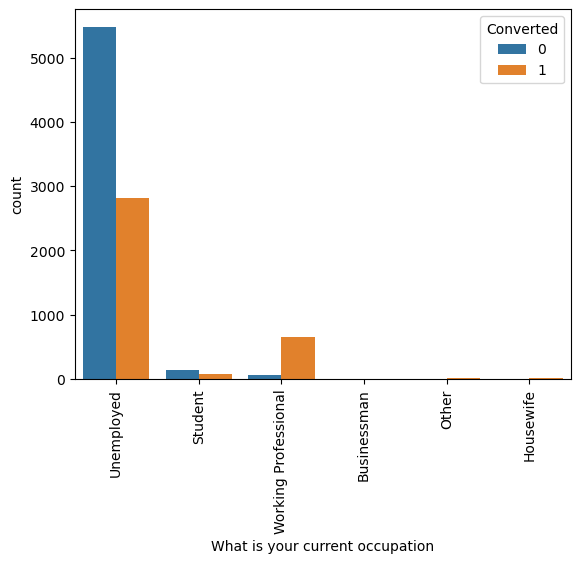

In [670]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(data=df,x='What is your current occupation', hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [672]:
#working professionals look like they would join course compared to unemployed people

In [674]:
#checking value counts

df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [676]:
#replacing Nan values with Mode "Better Career Prospects"

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

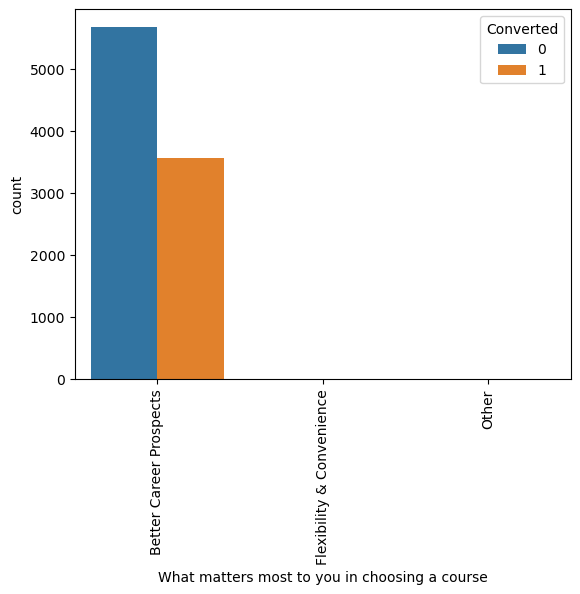

In [678]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(data=df,x='What matters most to you in choosing a course', hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [680]:
#checking value counts of variable
df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [682]:
# we have another Column that is worth Dropping so we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [684]:
#checking value counts of Tag variable
df['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [686]:
#replacing Nan values with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')


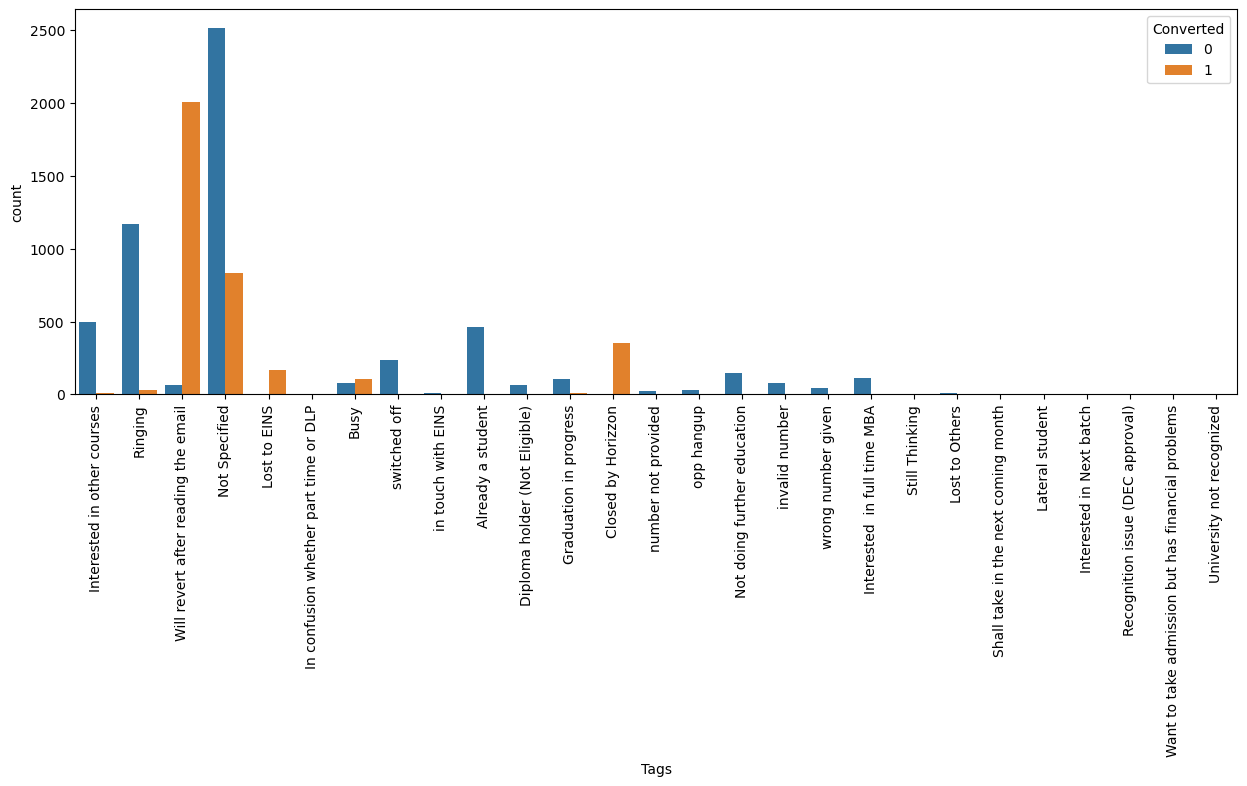

In [688]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(data=df,x="Tags", hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [689]:
#replacing tags with low frequency with "Other Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

df['Tags'] = df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [692]:
#checking percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [694]:
#checking values of lead source column
df['Lead Source'].value_counts(dropna=False)


Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [696]:
#replacing Nan Values and combining low frequency values
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

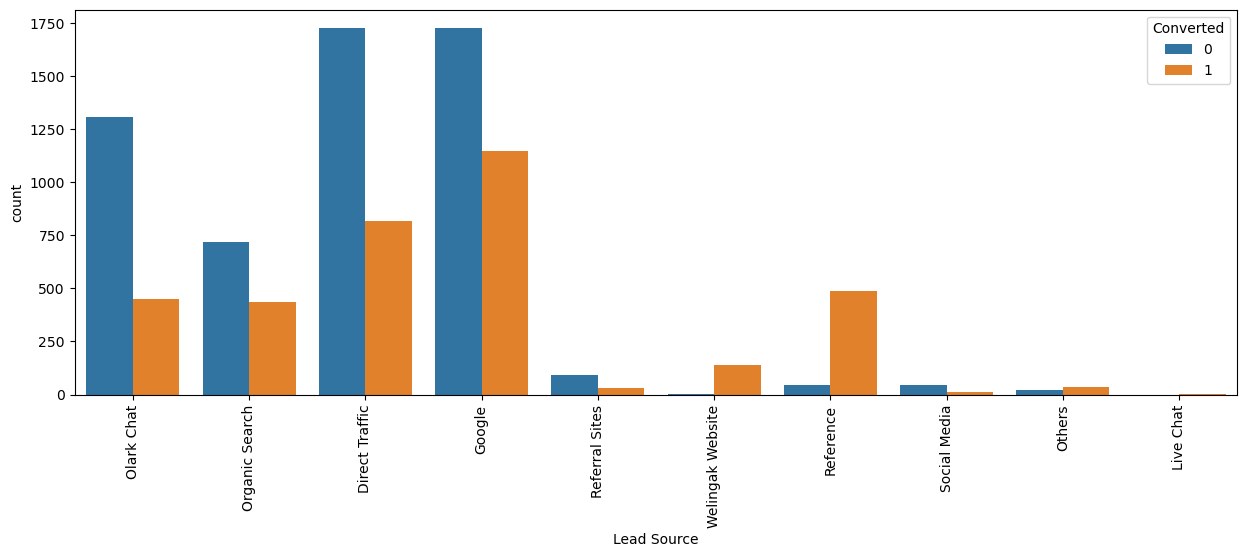

In [698]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(data=df,x='Lead Source', hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

###### Maximum leads generated by Google and Direct Traffic
###### Conversion rate of leads is high through the welingak website

In [701]:
# Last Activity:

df['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [703]:
#replacing Nan Values and combining low frequency values

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [705]:
#Check the Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [707]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
df = df.dropna()

In [709]:
#Lead Origin
df['Lead Origin'].value_counts(dropna=False)

Lead Origin
Landing Page Submission    4850
API                        1902
Lead Add Form                27
Name: count, dtype: int64

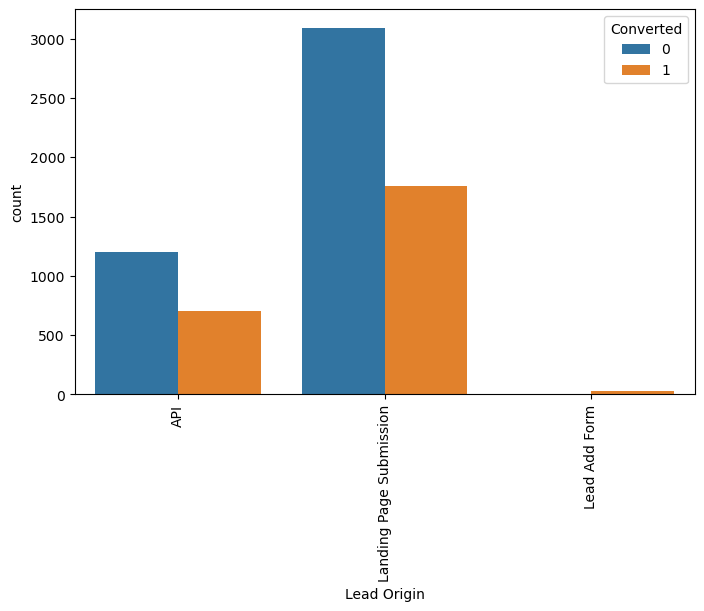

In [711]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(data=df,x='Lead Origin', hue="Converted")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### 1. API and Landing Page Submission bring higher number of leads as well as conversion.
##### 2. Lead Add Form has a very high conversion rate but count of leads are not very high.
##### 3.Lead Import and Quick Add Form get very few leads.

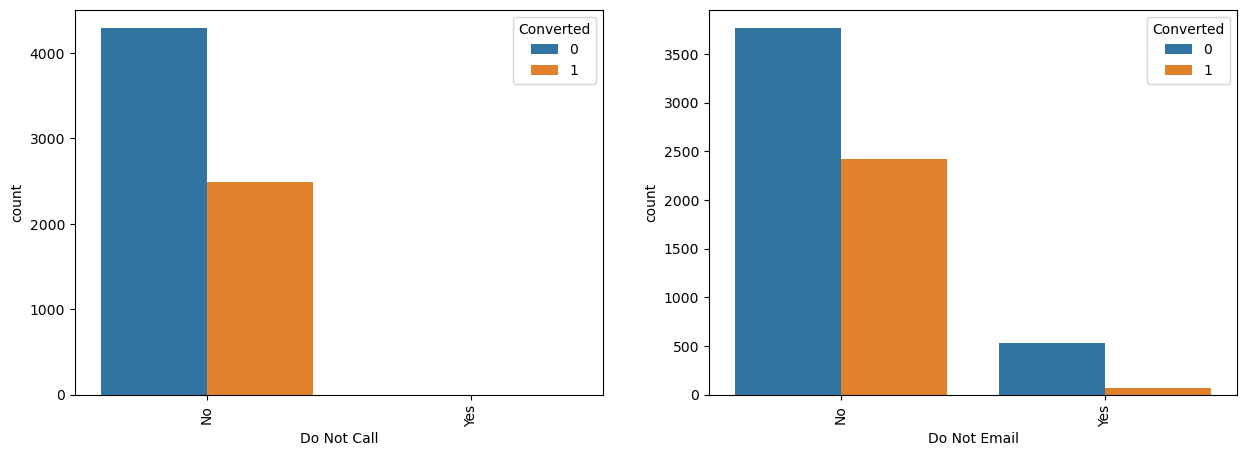

In [714]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(data=df,x='Do Not Call',hue="Converted")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(data=df,x='Do Not Email', hue="Converted")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [716]:
#checking value counts for Do Not Call
df['Do Not Call'].value_counts(dropna=False)

Do Not Call
No     6778
Yes       1
Name: count, dtype: int64

In [718]:
#checking value counts for Do Not Email
df['Do Not Email'].value_counts(dropna=False)

Do Not Email
No     6186
Yes     593
Name: count, dtype: int64

In [720]:
#can append do not call column since majority of the values are of one value
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [722]:
df.Search.value_counts(dropna=False)


Search
No     6765
Yes      14
Name: count, dtype: int64

In [724]:
df.Magazine.value_counts(dropna=False)


Magazine
No    6779
Name: count, dtype: int64

In [726]:
df['Newspaper Article'].value_counts(dropna=False)

Newspaper Article
No     6777
Yes       2
Name: count, dtype: int64

In [728]:
df['X Education Forums'].value_counts(dropna=False)


X Education Forums
No     6778
Yes       1
Name: count, dtype: int64

In [730]:
df['Newspaper'].value_counts(dropna=False)


Newspaper
No     6778
Yes       1
Name: count, dtype: int64

In [732]:
df['Digital Advertisement'].value_counts(dropna=False)


Digital Advertisement
No     6775
Yes       4
Name: count, dtype: int64

In [734]:
df['Through Recommendations'].value_counts(dropna=False)


Through Recommendations
No     6772
Yes       7
Name: count, dtype: int64

In [736]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)


Receive More Updates About Our Courses
No    6779
Name: count, dtype: int64

In [738]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)


Update me on Supply Chain Content
No    6779
Name: count, dtype: int64

In [740]:
df['Get updates on DM Content'].value_counts(dropna=False)


Get updates on DM Content
No    6779
Name: count, dtype: int64

In [742]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)


I agree to pay the amount through cheque
No    6779
Name: count, dtype: int64

In [744]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)


A free copy of Mastering The Interview
No     3913
Yes    2866
Name: count, dtype: int64

In [746]:
#the above columns are the columns that need to be dropped because majority of the rows there belong to one value which causes imbalance
cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [748]:
#checking value counts of last Notable Activity
df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        2331
Email Opened                    2212
SMS Sent                        1643
Page Visited on Website          286
Email Link Clicked               106
Olark Chat Conversation           68
Email Bounced                     48
Unsubscribed                      40
Unreachable                       26
Had a Phone Conversation          14
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Email Marked Spam                  1
Name: count, dtype: int64

In [750]:
#clubbing lower frequency values

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

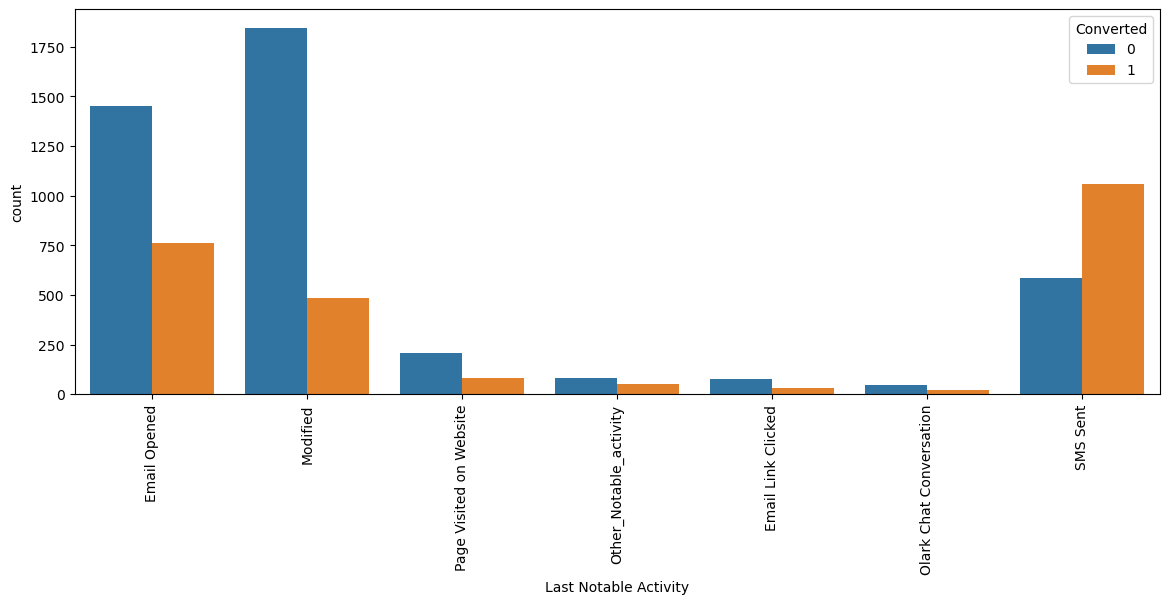

In [752]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [754]:
#checking value counts for variable

df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   2331
Email Opened               2212
SMS Sent                   1643
Page Visited on Website     286
Other_Notable_activity      133
Email Link Clicked          106
Olark Chat Conversation      68
Name: count, dtype: int64

In [756]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [758]:
#dropping columns
df = df.drop(cols_to_drop,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6779 entries, 1 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             6779 non-null   object 
 1   Lead Number                             6779 non-null   int64  
 2   Lead Origin                             6779 non-null   object 
 3   Lead Source                             6779 non-null   object 
 4   Do Not Email                            6779 non-null   object 
 5   Converted                               6779 non-null   int64  
 6   TotalVisits                             6779 non-null   float64
 7   Total Time Spent on Website             6779 non-null   int64  
 8   Page Views Per Visit                    6779 non-null   float64
 9   Last Activity                           6779 non-null   object 
 10  Specialization                          6779 non-null   object 
 

In [760]:
#Numeric columns analysis
#Check the % of Data that has Converted Values = 1:

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

36.65732408909869

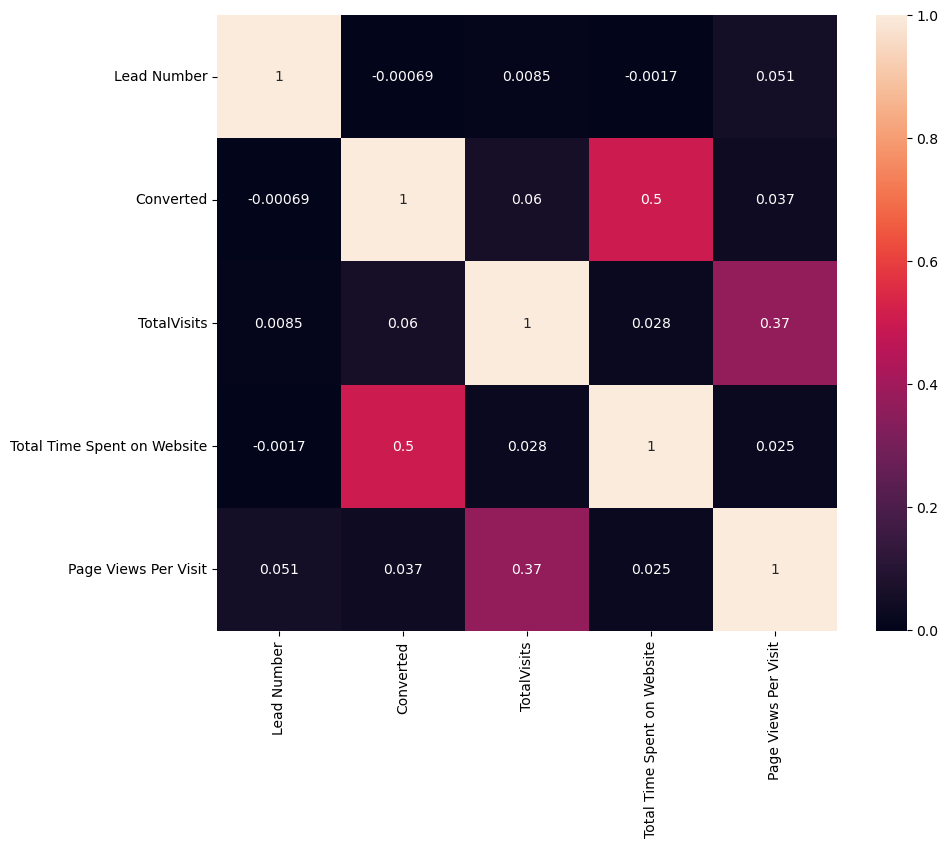

In [762]:
#Checking correlations of numeric values
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)
plt.show()

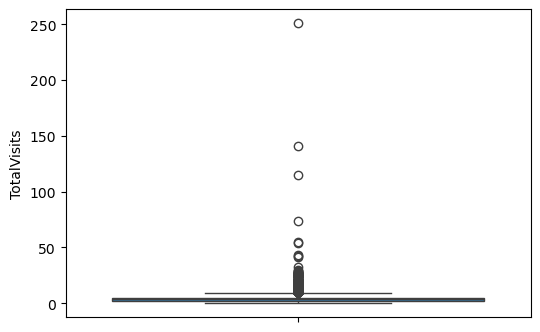

In [764]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

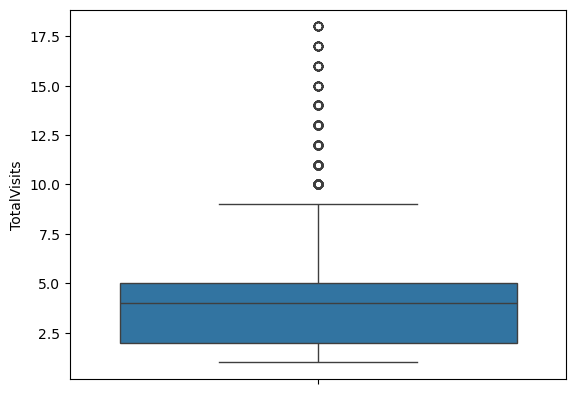

In [766]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

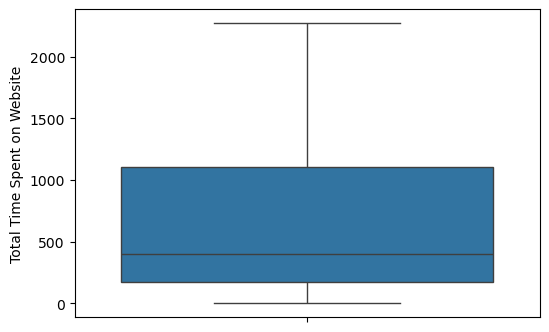

In [768]:
#visualizing spread of numeric variable Total Time spent on website

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

In [770]:
#no outliers available above

In [772]:
#checking spread of "Page Views Per Visit"

df['Page Views Per Visit'].describe()

count    6706.000000
mean        3.104545
std         1.817244
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

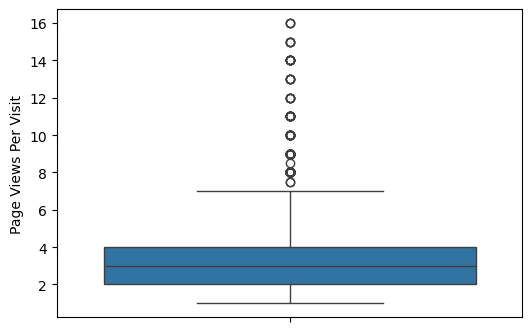

In [774]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

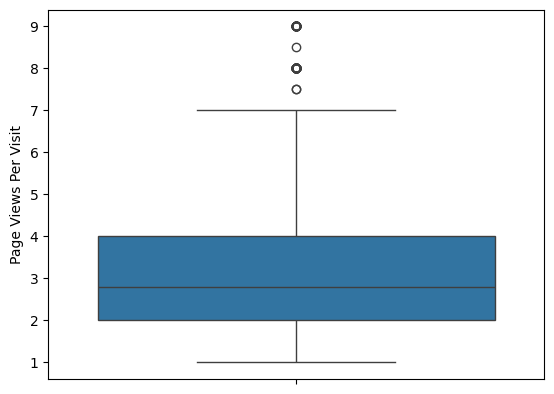

In [776]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q3]
Q1 = df['Page Views Per Visit'].quantile(0.01)
df= df[df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

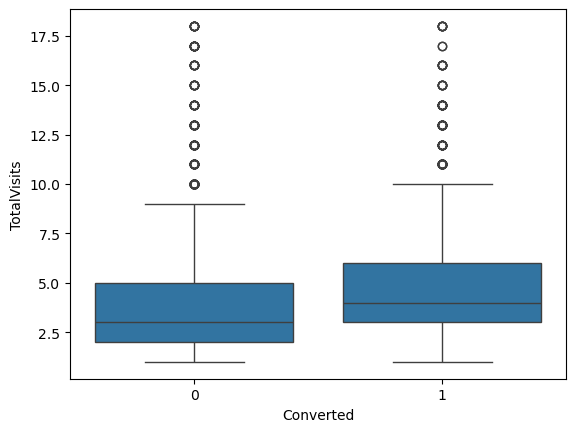

In [778]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

In [780]:
#nothing can be inferred from above because median for both converted and not converted is close

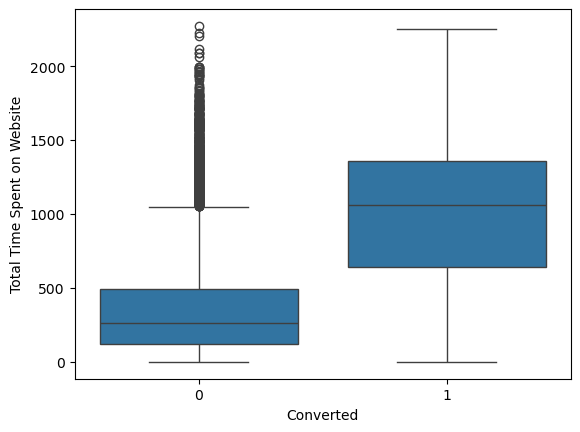

In [784]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

In [786]:
#leads spending more time on website are getting converted

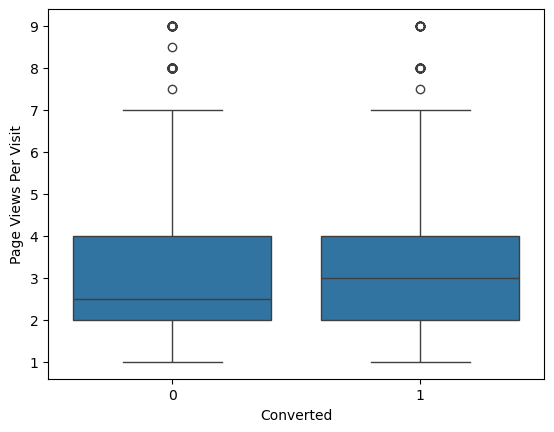

In [788]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

In [790]:
#median is almost equal so nothing can be concluded from page views per visit

###### Dummy variable creation 

In [793]:
#getting a list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [795]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [797]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

df = pd.concat([df,dummy],axis=1)

In [799]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'],axis= 1)
df = pd.concat([df, dummy], axis = 1)

In [803]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'],axis= 1)
df = pd.concat([df, dummy], axis = 1)


In [807]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], axis=1)
df = pd.concat([df, dummy], axis = 1)

In [809]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'],axis= 1)
df = pd.concat([df, dummy], axis = 1)


In [811]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], axis=1)
df = pd.concat([df, dummy], axis = 1)

In [815]:
#dropping the original columns after dummy variable creation

df.drop(cat_cols,axis=1,inplace = True)

In [817]:
df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1,660728,0,5.0,674,2.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,660727,1,2.0,1532,2.0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,660719,0,1.0,305,1.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,660681,1,2.0,1428,1.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,660673,1,2.0,1640,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


##### Train, test and split the data 

In [820]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)

In [822]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [824]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4648 entries, 1979 to 7849
Data columns (total 55 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           4648 non-null   int64  
 1   TotalVisits                                           4648 non-null   float64
 2   Total Time Spent on Website                           4648 non-null   int64  
 3   Page Views Per Visit                                  4648 non-null   float64
 4   Lead Origin_Landing Page Submission                   4648 non-null   bool   
 5   Lead Origin_Lead Add Form                             4648 non-null   bool   
 6   What is your current occupation_Housewife             4648 non-null   bool   
 7   What is your current occupation_Other                 4648 non-null   bool   
 8   What is your current occupation_Student               4648 n

In [826]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1979,0.970945,0.668033,1.836717,1.846001,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
6249,-0.666332,1.418399,1.230405,-0.225650,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5557,-0.434646,1.793583,1.857051,3.712353,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7865,-1.191823,1.793583,-0.645835,3.712353,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
8491,-1.384541,-0.082334,0.086176,0.601766,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


#### Model Building 

In [829]:
import statsmodels.api as sm

In [833]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)  # Use keyword argument
rfe = rfe.fit(X_train, y_train)

In [835]:
rfe.support_

array([False, False,  True, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True])

In [837]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 41),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('What is your current occupation_Housewife', False, 28),
 ('What is your current occupation_Other', False, 33),
 ('What is your current occupation_Student', False, 7),
 ('What is your current occupation_Unemployed', False, 3),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 40),
 ('City_Other Cities of Maharashtra', False, 34),
 ('City_Other Metro Cities', False, 29),
 ('City_Thane & Outskirts', False, 37),
 ('City_Tier II Cities', False, 6),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 10),
 ('Specialization_E-Business', False, 19),
 ('Specialization_E-COMMERCE', False, 9),
 ('Specialization_International Business', False, 39),
 ('Spec

In [839]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [841]:
X_train.columns[~rfe.support_]


Index(['Lead Number', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       '

In [855]:
print(X_train[col].dtypes)


Total Time Spent on Website                             float64
Lead Origin_Lead Add Form                                  bool
What is your current occupation_Working Professional       bool
Last Activity_Email Bounced                                bool
Last Activity_SMS Sent                                     bool
Last Notable Activity_Modified                             bool
Last Notable Activity_Olark Chat Conversation              bool
Last Notable Activity_SMS Sent                             bool
Tags_Busy                                                  bool
Tags_Closed by Horizzon                                    bool
Tags_Interested in other courses                           bool
Tags_Lost to EINS                                          bool
Tags_Other_Tags                                            bool
Tags_Ringing                                               bool
Tags_Will revert after reading the email                   bool
dtype: object


In [857]:
X_train[col] = pd.get_dummies(X_train[col], drop_first=True)


In [859]:
X_train[col] = X_train[col].apply(pd.to_numeric, errors='coerce')


In [861]:
print(X_train[col].isnull().sum())


Total Time Spent on Website                             0
Lead Origin_Lead Add Form                               0
What is your current occupation_Working Professional    0
Last Activity_Email Bounced                             0
Last Activity_SMS Sent                                  0
Last Notable Activity_Modified                          0
Last Notable Activity_Olark Chat Conversation           0
Last Notable Activity_SMS Sent                          0
Tags_Busy                                               0
Tags_Closed by Horizzon                                 0
Tags_Interested in other courses                        0
Tags_Lost to EINS                                       0
Tags_Other_Tags                                         0
Tags_Ringing                                            0
Tags_Will revert after reading the email                0
dtype: int64


In [863]:
X_train_sm = np.asarray(X_train[col], dtype=float)


In [871]:
X_train[col] = X_train[col].astype(int)


In [873]:
print(X_train[col].dtypes)


Total Time Spent on Website                             int32
Lead Origin_Lead Add Form                               int32
What is your current occupation_Working Professional    int32
Last Activity_Email Bounced                             int32
Last Activity_SMS Sent                                  int32
Last Notable Activity_Modified                          int32
Last Notable Activity_Olark Chat Conversation           int32
Last Notable Activity_SMS Sent                          int32
Tags_Busy                                               int32
Tags_Closed by Horizzon                                 int32
Tags_Interested in other courses                        int32
Tags_Lost to EINS                                       int32
Tags_Other_Tags                                         int32
Tags_Ringing                                            int32
Tags_Will revert after reading the email                int32
dtype: object


In [875]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4632
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -964.76
Date:                Mon, 17 Mar 2025   Deviance:                       1929.5
Time:                        21:20:49   Pearson chi2:                 5.44e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5914
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6108      0.101    -15.924      0.000      -1.809      -1.413
Total Time Spent on Website                              1.2008      0.097     12.442      0.000       1.012       1.390
Lead Origin_Lead Add Form                               24.5388   4.07e+04      0.001      1.000   -7.98e+04    7.98e+04
What is your current occupation_Working Professional     1.1450      0.490      2.335      0.020       0.184       2.106
Last Activity_Email Bounced                             -1.3310      0.531     -2.507      0.012      -2.372      -0.290
Last Activity_SMS Sent                                   0.8690      0.249      3.496      0.000       0.382       1.356
Last Notable Activity_Modified                          -0.8672      0.175     -4.950      0.000      -1.211      -0.524
Last Notable Activity_Olark Chat Conversation           -0.4714      0.532     -0.885      0.376      -1.515       0.572
Last Notable Activity_SMS Sent                           1.1921      0.287      4.159      0.000       0.630       1.754
Tags_Busy                                                0.7937      0.237      3.344      0.001       0.328       1.259
Tags_Closed by Horizzon                                 27.1308   1.86e+04      0.001      0.999   -3.64e+04    3.64e+04
Tags_Interested in other courses                        -1.9861      0.421     -4.720      0.000      -2.811      -1.161
Tags_Lost to EINS                                        5.1825      0.609      8.508      0.000       3.989       6.376
Tags_Other_Tags                                         -2.5343      0.235    -10.768      0.000      -2.996      -2.073
Tags_Ringing                                            -3.4277      0.278    -12.320      0.000      -3.973      -2.882
Tags_Will revert after reading the email                 4.6475      0.226     20.563      0.000       4.204       5.090
========================================================================================================================
"""

In [879]:
# lead origin_lead add form has the highest p value so drop it
#dropping column with high p-value

col = col.drop('Lead Origin_Lead Add Form',1)


In [881]:
#BUILDING MODEL 2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4633
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -968.39
Date:                Mon, 17 Mar 2025   Deviance:                       1936.8
Time:                        21:22:08   Pearson chi2:                 5.43e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5908
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5937      0.101    -15.849      0.000      -1.791      -1.397
Total Time Spent on Website                              1.1977      0.096     12.425      0.000       1.009       1.387
What is your current occupation_Working Professional     1.1441      0.490      2.337      0.019       0.184       2.104
Last Activity_Email Bounced                             -1.3355      0.530     -2.518      0.012      -2.375      -0.296
Last Activity_SMS Sent                                   0.8678      0.248      3.494      0.000       0.381       1.355
Last Notable Activity_Modified                          -0.8808      0.175     -5.037      0.000      -1.224      -0.538
Last Notable Activity_Olark Chat Conversation           -0.4860      0.532     -0.913      0.361      -1.529       0.557
Last Notable Activity_SMS Sent                           1.1791      0.286      4.118      0.000       0.618       1.740
Tags_Busy                                                0.7863      0.237      3.316      0.001       0.322       1.251
Tags_Closed by Horizzon                                 26.2985   1.16e+04      0.002      0.998   -2.27e+04    2.27e+04
Tags_Interested in other courses                        -1.9922      0.421     -4.737      0.000      -2.817      -1.168
Tags_Lost to EINS                                        5.1754      0.609      8.497      0.000       3.982       6.369
Tags_Other_Tags                                         -2.5399      0.235    -10.801      0.000      -3.001      -2.079
Tags_Ringing                                            -3.4317      0.278    -12.342      0.000      -3.977      -2.887
Tags_Will revert after reading the email                 4.6397      0.226     20.538      0.000       4.197       5.083
========================================================================================================================
"""

In [883]:
#p value of tags_closed by Horizzon is high so drop it 

In [885]:
col = col.drop('Tags_Closed by Horizzon',1)


In [887]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4634
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1119.3
Date:                Mon, 17 Mar 2025   Deviance:                       2238.7
Time:                        21:23:14   Pearson chi2:                 5.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5633
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3065      0.091    -14.359      0.000      -1.485      -1.128
Total Time Spent on Website                              1.1971      0.089     13.412      0.000       1.022       1.372
What is your current occupation_Working Professional     2.5523      0.364      7.007      0.000       1.838       3.266
Last Activity_Email Bounced                             -1.6945      0.470     -3.603      0.000      -2.616      -0.773
Last Activity_SMS Sent                                   0.2368      0.224      1.059      0.290      -0.201       0.675
Last Notable Activity_Modified                          -0.4131      0.143     -2.896      0.004      -0.693      -0.134
Last Notable Activity_Olark Chat Conversation           -0.5390      0.491     -1.099      0.272      -1.500       0.422
Last Notable Activity_SMS Sent                           1.6206      0.264      6.129      0.000       1.102       2.139
Tags_Busy                                                0.5572      0.231      2.412      0.016       0.104       1.010
Tags_Interested in other courses                        -2.6199      0.419     -6.252      0.000      -3.441      -1.799
Tags_Lost to EINS                                        4.5975      0.602      7.632      0.000       3.417       5.778
Tags_Other_Tags                                         -2.8343      0.232    -12.238      0.000      -3.288      -2.380
Tags_Ringing                                            -3.6216      0.277    -13.067      0.000      -4.165      -3.078
Tags_Will revert after reading the email                 4.1827      0.216     19.332      0.000       3.759       4.607
========================================================================================================================
"""

In [889]:
#p value of last activity_sms sent is high so drop it 

In [891]:
col = col.drop('Last Activity_SMS Sent',1)

In [893]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4635
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1119.9
Date:                Mon, 17 Mar 2025   Deviance:                       2239.8
Time:                        21:25:36   Pearson chi2:                 5.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5632
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3060      0.091    -14.356      0.000      -1.484      -1.128
Total Time Spent on Website                              1.1956      0.089     13.397      0.000       1.021       1.371
What is your current occupation_Working Professional     2.5460      0.365      6.982      0.000       1.831       3.261
Last Activity_Email Bounced                             -1.7369      0.468     -3.711      0.000      -2.654      -0.820
Last Notable Activity_Modified                          -0.3517      0.129     -2.719      0.007      -0.605      -0.098
Last Notable Activity_Olark Chat Conversation           -0.5378      0.490     -1.096      0.273      -1.499       0.424
Last Notable Activity_SMS Sent                           1.8553      0.145     12.825      0.000       1.572       2.139
Tags_Busy                                                0.5758      0.231      2.493      0.013       0.123       1.029
Tags_Interested in other courses                        -2.6472      0.418     -6.331      0.000      -3.467      -1.828
Tags_Lost to EINS                                        4.5811      0.602      7.613      0.000       3.402       5.760
Tags_Other_Tags                                         -2.8349      0.231    -12.262      0.000      -3.288      -2.382
Tags_Ringing                                            -3.6186      0.277    -13.059      0.000      -4.162      -3.075
Tags_Will revert after reading the email                 4.1810      0.216     19.338      0.000       3.757       4.605
========================================================================================================================
"""

In [895]:
# p value of Last Notable Activity_Olark Chat Conversation is high so drop it 

In [897]:
col = col.drop('Last Notable Activity_Olark Chat Conversation',1)

In [899]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4636
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1120.5
Date:                Mon, 17 Mar 2025   Deviance:                       2241.1
Time:                        21:26:39   Pearson chi2:                 5.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5631
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3241      0.090    -14.746      0.000      -1.500      -1.148
Total Time Spent on Website                              1.1914      0.089     13.368      0.000       1.017       1.366
What is your current occupation_Working Professional     2.5564      0.365      7.013      0.000       1.842       3.271
Last Activity_Email Bounced                             -1.7321      0.468     -3.701      0.000      -2.649      -0.815
Last Notable Activity_Modified                          -0.3338      0.129     -2.598      0.009      -0.586      -0.082
Last Notable Activity_SMS Sent                           1.8719      0.144     12.998      0.000       1.590       2.154
Tags_Busy                                                0.5836      0.231      2.527      0.012       0.131       1.036
Tags_Interested in other courses                        -2.6547      0.418     -6.349      0.000      -3.474      -1.835
Tags_Lost to EINS                                        4.5839      0.602      7.617      0.000       3.404       5.763
Tags_Other_Tags                                         -2.8302      0.231    -12.246      0.000      -3.283      -2.377
Tags_Ringing                                            -3.6126      0.277    -13.039      0.000      -4.156      -3.070
Tags_Will revert after reading the email                 4.1848      0.216     19.366      0.000       3.761       4.608
========================================================================================================================
"""

In [901]:
# all p values are less now so time to check the Variance Inflation Factor

In [903]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [905]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,1.63
4,Last Notable Activity_SMS Sent,1.47
3,Last Notable Activity_Modified,1.46
1,What is your current occupation_Working Profes...,1.27
8,Tags_Other_Tags,1.19
6,Tags_Interested in other courses,1.13
9,Tags_Ringing,1.13
0,Total Time Spent on Website,1.10
2,Last Activity_Email Bounced,1.09
5,Tags_Busy,1.04


In [907]:
#Vif are in order 

In [909]:
#Prediction on data set

In [911]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1979    0.850587
6249    0.466877
5557    0.049131
7865    0.007127
8491    0.007127
2573    0.160048
474     0.160048
4477    0.971838
1952    0.074783
1816    0.005115
dtype: float64

In [913]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.85058736, 0.46687676, 0.04913079, 0.00712738, 0.00712738,
       0.1600484 , 0.1600484 , 0.97183846, 0.07478316, 0.00511492])

In [915]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.850587,1979
1,0,0.466877,6249
2,0,0.049131,5557
3,0,0.007127,7865
4,0,0.007127,8491


In [917]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.850587,1979,1
1,0,0.466877,6249,0
2,0,0.049131,5557,0
3,0,0.007127,7865,0
4,0,0.007127,8491,0


In [919]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2844  117]
 [ 312 1375]]


In [921]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9077022375215146


In [923]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [925]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8150563129816242

In [927]:
# Let us calculate specificity
TN / float(TN+FP)


0.9604863221884499

In [929]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))


0.03951367781155015


In [931]:
# positive predictive value 
print (TP / float(TP+FP))


0.9215817694369973


In [933]:
# Negative predictive value
print (TN / float(TN+ FN))


0.9011406844106464


In [935]:
# plotting ROC curve

In [937]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [939]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


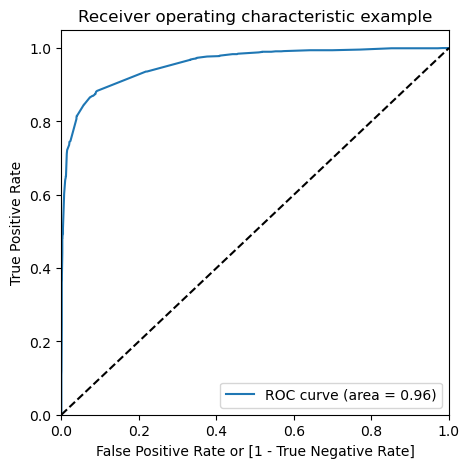

In [941]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


In [943]:
## Roc curve value is 0.96 which shows a good predictive model (close to 1)

In [945]:
## find the optimal cut off point, a=we had setn random point as 0.5 above

In [947]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.850587,1979,1,1,1,1,1,1,1,1,1,1,0
1,0,0.466877,6249,0,1,1,1,1,1,0,0,0,0,0
2,0,0.049131,5557,0,1,0,0,0,0,0,0,0,0,0
3,0,0.007127,7865,0,1,0,0,0,0,0,0,0,0,0
4,0,0.007127,8491,0,1,0,0,0,0,0,0,0,0,0


In [949]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.362952  1.000000  0.000000
0.1   0.1  0.768718  0.972140  0.652820
0.2   0.2  0.837995  0.935981  0.782168
0.3   0.3  0.898881  0.874333  0.912867
0.4   0.4  0.906842  0.845287  0.941912
0.5   0.5  0.907702  0.815056  0.960486
0.6   0.6  0.906196  0.809721  0.961162
0.7   0.7  0.893718  0.743331  0.979399
0.8   0.8  0.886403  0.711322  0.986153
0.9   0.9  0.864673  0.646710  0.988855


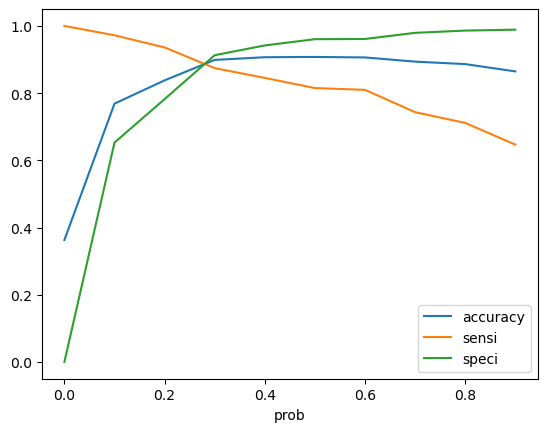

In [951]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [953]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.850587,1979,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.466877,6249,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.049131,5557,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.007127,7865,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.007127,8491,0,1,0,0,0,0,0,0,0,0,0,0


In [955]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.850587,1979,1,85
1,0,0.466877,6249,1,47
2,0,0.049131,5557,0,5
3,0,0.007127,7865,0,1
4,0,0.007127,8491,0,1


In [957]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.898881239242685

In [959]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2


array([[2703,  258],
       [ 212, 1475]], dtype=int64)

In [962]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [964]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)


0.8743331357439241

In [966]:
# Let us calculate specificity
TN / float(TN+FP)


0.9128672745694022

#### Observation is that ROC curve is at 0.96 which shows a good model and values on train data  are 
#### accuracy= 89.88%
#### sensitivity =87.43%
#### specificity = 91.28%

In [973]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))


0.08713272543059777


In [975]:
# Positive predictive value 
print (TP / float(TP+FP))


0.8511252163877668


In [977]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9272727272727272


In [979]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2703,  258],
       [ 212, 1475]], dtype=int64)

In [981]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])


0.8511252163877668

In [983]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8743331357439241

In [985]:
from sklearn.metrics import precision_score, recall_score


In [987]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)


0.8511252163877668

In [989]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)


0.8743331357439241

In [991]:
from sklearn.metrics import precision_recall_curve


In [993]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


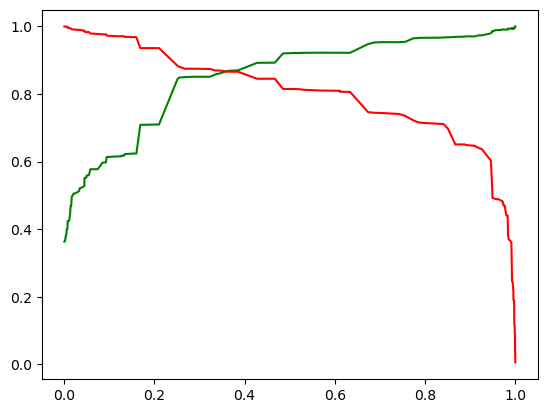

In [995]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [997]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8970,-1.521962,-1.144209,-0.560701,-1.266390,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
8280,-1.308192,-0.783851,-0.236439,-0.628396,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6941,-0.895670,-0.783851,-1.021301,-1.266390,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
7343,-1.036285,4.621518,0.028867,-0.545456,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3734,0.282955,-0.063135,-0.582810,0.647593,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [999]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,What is your current occupation_Working Professional,Last Activity_Email Bounced,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8970,-0.560701,False,False,True,False,False,True,False,False,False,False
8280,-0.236439,False,False,False,False,False,False,False,False,False,False
6941,-1.021301,False,False,False,False,False,True,False,False,False,False
7343,0.028867,False,False,True,False,False,False,False,False,False,True
3734,-0.582810,False,False,True,False,False,False,False,False,False,False


In [1001]:
X_test_sm = sm.add_constant(X_test)

In [1003]:
## Prediction on test data set

In [1009]:
print(X_test_sm.dtypes)


const                                                   float64
Total Time Spent on Website                             float64
What is your current occupation_Working Professional       bool
Last Activity_Email Bounced                                bool
Last Notable Activity_Modified                             bool
Last Notable Activity_SMS Sent                             bool
Tags_Busy                                                  bool
Tags_Interested in other courses                           bool
Tags_Lost to EINS                                          bool
Tags_Other_Tags                                            bool
Tags_Ringing                                               bool
Tags_Will revert after reading the email                   bool
dtype: object


In [1011]:
X_test_sm = X_test_sm.astype(float)


In [1013]:
y_test_pred = res.predict(X_test_sm)


In [1015]:
y_test_pred[:10]


8970    0.006823
8280    0.167180
6941    0.005511
7343    0.928328
3734    0.086890
7889    0.707369
837     0.005427
8227    0.018171
7245    0.999479
8622    0.897361
dtype: float64

In [1017]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1019]:
# Let's see the head
y_pred_1.head()

,0
8970,0.006823
8280,0.167180
6941,0.005511
7343,0.928328
3734,0.086890


In [1021]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)


In [1023]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [1025]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1027]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1029]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8970,0.006823
1,0,8280,0.167180
2,0,6941,0.005511
3,0,7343,0.928328
4,0,3734,0.086890


In [1031]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [1033]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [1035]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,8970,0,0.006823,1
1,8280,0,0.167180,17
2,6941,0,0.005511,1
3,7343,0,0.928328,93
4,3734,0,0.086890,9


In [1037]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [1039]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,8970,0,0.006823,1,0
1,8280,0,0.167180,17,0
2,6941,0,0.005511,1,0
3,7343,0,0.928328,93,1
4,3734,0,0.086890,9,0


In [1041]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9081325301204819

In [1043]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1141,  117],
       [  66,  668]], dtype=int64)

In [1045]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [1047]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9100817438692098

In [1049]:
# Let us calculate specificity
TN / float(TN+FP)

0.9069952305246423

In [1051]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8509554140127389

In [1053]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9100817438692098

##### Observations 
##### The values on the test data as follows
##### accuracy=90.81%
##### sensitivity = 91.00%
##### specificity=90.69%

#### Compare the values on test and train data 
#### train data values are as:
#### accuracy=89.88%
#### sensitivity=87.43%
#### specificity=91.28%
#### test data values are as:
#### accuracy=90.81%
#### sensitivity=91.00%
#### specificity=90.69%

## The values of the model on both test and train data set are close by and therefore is considered a good model for predicting the conversion rates